ĐỖ MINH TRIỀU_19146283_BÀI TẬP AI-ANN-CNN

**Face**


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
load_train_data='/content/drive/MyDrive/Colab Notebooks/Face/train'
load_validation_data='/content/drive/MyDrive/Colab Notebooks/Face/validation'

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
   )
validation_set=validation.flow_from_directory(
    load_validation_data,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
    )

Found 87 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'khongphaitrieu': 0, 'trieu': 1}
{'khongphaitrieu': 0, 'trieu': 1}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='Softmax'))
model.compile(loss='categorical_crossentropy',optimizer = RMSprop(),metrics = ['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
9/9 [==============================] - 67s 8s/step - loss: 20.3703 - accuracy: 0.5977 - val_loss: 0.0177 - val_accuracy: 0.9881
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 4.5354 - accuracy: 0.7931 - val_loss: 0.0125 - val_accuracy: 0.9881
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.9669 - accuracy: 0.9080 - val_loss: 0.4918 - val_accuracy: 0.9286
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 3.1728 - accuracy: 0.8621 - val_loss: 7.2854 - val_accuracy: 0.3929
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.2212 - accuracy: 0.9770 - val_loss: 1.2870 - val_accuracy: 0.9048
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.1114 - accuracy: 0.9885 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 6.2636e-05 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 8/10
9/9 [=============

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modeltrain/face.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/Colab Notebooks/modeltrain/face.h5')

array([1])

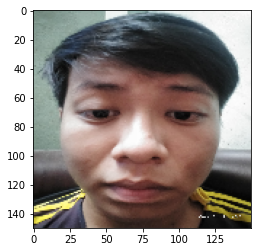

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tien.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

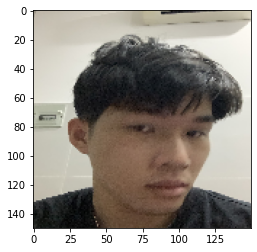

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/trieu.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([0])

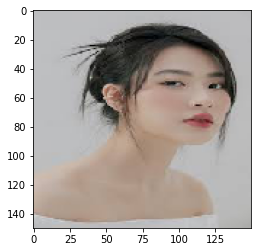

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tải xuống (18).jpeg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

Cifar10


In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,15)
y_test=to_categorical(y_test,15)

<function matplotlib.pyplot.show>

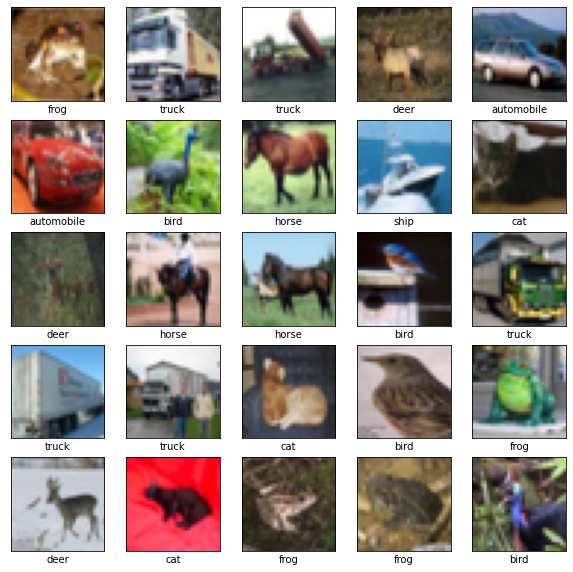

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(names[np.argmax(y_train[i])])
plt.show

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 15)                1935      
                                                                 
Total params: 411,791
Trainable params: 411,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(lr = 0.01,momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs = 10,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 1.8802 - accuracy: 0.3226
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6955 - accuracy: 0.3894
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.6124 - accuracy: 0.4204
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5629 - accuracy: 0.4421
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5369 - accuracy: 0.4519
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5073 - accuracy: 0.4627
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4809 - accuracy: 0.4712
Epoch 8/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4620 - accuracy: 0.4784
Epoch 9/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4523 - accuracy: 0.4826
Epoch 10/10
782/782 [==============================] - 6s 8ms/step - loss: 1.4320 - accuracy: 0.488

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modeltrain/cifar10.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/Colab Notebooks/modeltrain/cifar10.h5')

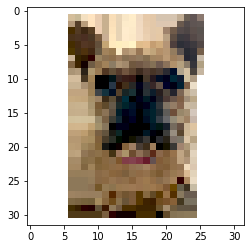

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('conchomatxe.png', target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([5])

array([0])

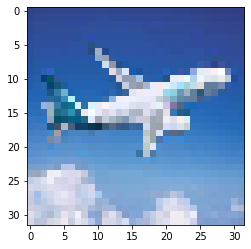

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tải xuống (19).jpeg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

Cifar100

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,150)
y_test=to_categorical(y_test,150)

<function matplotlib.pyplot.show>

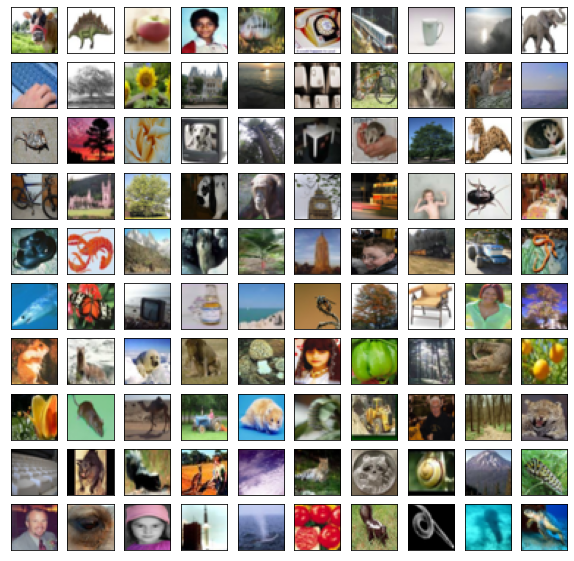

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(150,activation='Softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_8 (Dense)             (None, 150)               153750    
                                                                 
Total params: 4,350,102
Trainable params: 4,350,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(lr = 0.01,momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs = 10,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
391/391 [==============================] - 29s 73ms/step - loss: 4.0816 - accuracy: 0.0898
Epoch 2/10
391/391 [==============================] - 37s 94ms/step - loss: 3.6637 - accuracy: 0.1508
Epoch 3/10
391/391 [==============================] - 29s 74ms/step - loss: 3.4955 - accuracy: 0.1800
Epoch 4/10
391/391 [==============================] - 29s 73ms/step - loss: 3.3618 - accuracy: 0.2040
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 3.2596 - accuracy: 0.2201
Epoch 6/10
391/391 [==============================] - 28s 71ms/step - loss: 3.1591 - accuracy: 0.2386
Epoch 7/10
391/391 [==============================] - 29s 74ms/step - loss: 3.0791 - accuracy: 0.2536
Epoch 8/10
391/391 [==============================] - 28s 72ms/step - loss: 2.9944 - accuracy: 0.2695
Epoch 9/10
391/391 [==============================] - 28s 72ms/step - loss: 2.9217 - accuracy: 0.2836
Epoch 10/10
391/391 [==============================] - 29s 73ms/step - loss: 2.846

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modeltrain/cifar100.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/Colab Notebooks/modeltrain/cifar100.h5')

array([69])

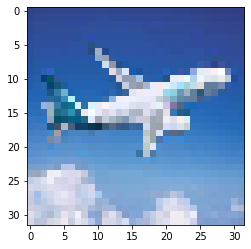

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tải xuống (19).jpeg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([31])

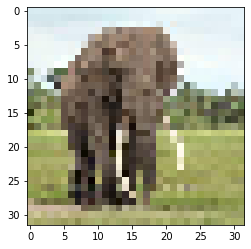

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tải xuống (20).jpeg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

Fashion


In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x = x_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


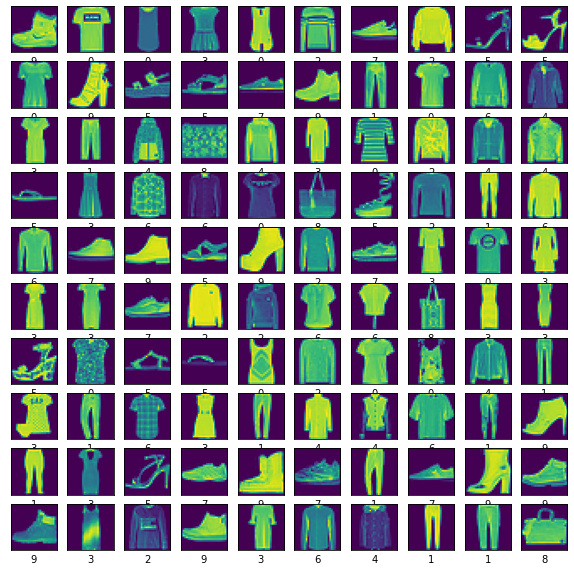

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([]) 
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.5657 - accuracy: 0.7961 - val_loss: 0.4362 - val_accuracy: 0.8451
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3881 - accuracy: 0.8574 - val_loss: 0.4056 - val_accuracy: 0.8483
Epoch 3/10
469/469 [======

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modeltrain/fashion.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/Colab Notebooks/modeltrain/fashion.h5')

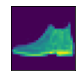

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


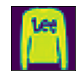

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


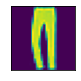

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


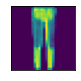

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


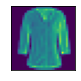

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


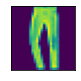

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


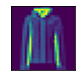

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


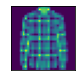

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


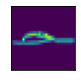

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x[i])
  plt.xticks([])
  plt.yticks([]) 
  plt.show()
  print(np.round(y_pred[i]))

array([8])

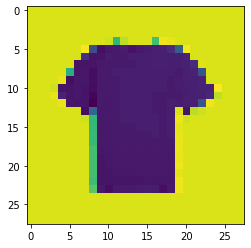

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/tải xuống.jpeg', target_size=(28,28),color_mode = 'grayscale')
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,784)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

*3* Face CNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
load_train_data='/content/drive/MyDrive/Colab Notebooks/3 Face/train'
load_validation_data='/content/drive/MyDrive/Colab Notebooks/3 Face/validation'

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical',
    )

Found 63 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'Binh': 0, 'Tien': 1, 'Trieu': 2}
{'Binh': 0, 'Tien': 1, 'Trieu': 2}


In [ ]:
model=Sequential()
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='Softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(train_data,batch_size=20,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
7/7 [==============================] - 86s 12s/step - loss: 224.4183 - accuracy: 0.2381 - val_loss: 0.7070 - val_accuracy: 0.9365
Epoch 2/10
7/7 [==============================] - 71s 10s/step - loss: 9.6687 - accuracy: 0.5556 - val_loss: 3.3405 - val_accuracy: 0.2540
Epoch 3/10
7/7 [==============================] - 70s 10s/step - loss: 25.7490 - accuracy: 0.3810 - val_loss: 1.1137 - val_accuracy: 0.8095
Epoch 4/10
7/7 [==============================] - 69s 10s/step - loss: 1.8119 - accuracy: 0.6349 - val_loss: 0.4650 - val_accuracy: 0.7143
Epoch 5/10
7/7 [==============================] - 69s 11s/step - loss: 0.0996 - accuracy: 0.9524 - val_loss: 5.4303e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 68s 11s/step - loss: 2.3060e-04 - accuracy: 1.0000 - val_loss: 4.3363e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 70s 10s/step - loss: 3.4093e-05 - accuracy: 1.0000 - val_loss: 1.9294e-05 - val_accuracy: 1.0000
Epoc

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modeltrain/3face.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/Colab Notebooks/modeltrain/3face.h5')

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/trieu.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([0])

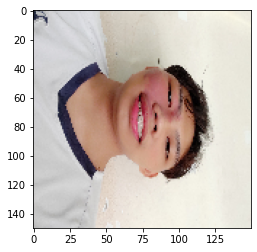

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/IMG_20220508_163452.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

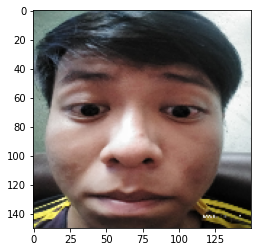

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/IMG20220511155050.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])

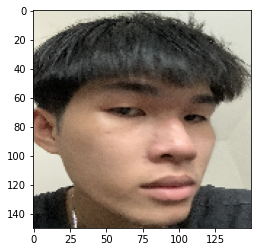

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/z3406345141833_2e70dcabe4617e2047515fc67efbe158.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

2 Bậc Tự Do

In [84]:
import numpy as np
import pandas as pd
import math as ma
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential 
from keras.layers import Flatten

In [85]:
l1=50
l2=40
Px=[]
Py=[]
Tt1=[]
Tt2=[]

In [86]:
for tt1 in range(0,360,1):
  for tt2 in range(0,360,1):
    Tt1.append((tt1*ma.pi)/180)
    Tt2.append((tt2*ma.pi)/180)
    
    Theta1=(tt1*ma.pi)/180 
    Theta2=(tt2*ma.pi)/180
    
    Px.append(l1*ma.cos(Theta1)+l2*ma.cos(Theta1+Theta2))
    Py.append(l1*ma.sin(Theta1)+l2*ma.sin(Theta1+Theta2)) 

In [87]:
data=pd.DataFrame()
data['Theta1']=Tt1
data['Theta2']=Tt2
data['Px']=Px
data['Py']=Py
data

,Theta1,Theta2,Px,Py
0,0.000000,0.000000,90.000000,0.000000
1,0.000000,0.017453,89.993908,0.698096
2,0.000000,0.034907,89.975633,1.395980
3,0.000000,0.052360,89.945181,2.093438
4,0.000000,0.069813,89.902562,2.790259
...,...,...,...,...
129595,6.265732,6.195919,89.773261,-5.053759
129596,6.265732,6.213372,89.840173,-4.358850
129597,6.265732,6.230825,89.894947,-3.662879
129598,6.265732,6.248279,89.937566,-2.966059


In [88]:
x = data.drop(['Theta1','Theta2'],axis=1)
y = data.drop(['Px','Py'],axis=1)
print(y)
print(x)

          Theta1    Theta2
0       0.000000  0.000000
1       0.000000  0.017453
2       0.000000  0.034907
3       0.000000  0.052360
4       0.000000  0.069813
...          ...       ...
129595  6.265732  6.195919
129596  6.265732  6.213372
129597  6.265732  6.230825
129598  6.265732  6.248279
129599  6.265732  6.265732

[129600 rows x 2 columns]
               Px        Py
0       90.000000  0.000000
1       89.993908  0.698096
2       89.975633  1.395980
3       89.945181  2.093438
4       89.902562  2.790259
...           ...       ...
129595  89.773261 -5.053759
129596  89.840173 -4.358850
129597  89.894947 -3.662879
129598  89.937566 -2.966059
129599  89.968018 -2.268600

[129600 rows x 2 columns]


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [90]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(2,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               384       
                                                                 
 dense_21 (Dense)            (None, 512)               66048     
                                                                 
 dense_22 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 67,458
Trainable params: 67,458
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1418/1418 [==============================] - 11s 7ms/step - loss: 9.9903 - accuracy: 0.7138 - val_loss: 9.9667 - val_accuracy: 0.6988
Epoch 2/10
1418/1418 [==============================] - 7s 5ms/step - loss: 9.9684 - accuracy: 0.7162 - val_loss: 9.9147 - val_accuracy: 0.7175
Epoch 3/10
1418/1418 [===

In [91]:
model.save('content/drive/MyDrive/Colab Notebooks/modeltrain/2bactudo.h5')